# $$ \text{Quiz}$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import odeint

# $\text{Exercise 1}$

Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{5} \dfrac{x^4+2x}{x}dx$$

$$B = \int_{0}^{2} \dfrac{x}{\sqrt{x^3 +1}}dx$$

In [2]:
a=0
b=5
f=lambda x: (x**4+2*x)/x
A=quad(f,a,b)[0]
print('A=' ,A)
c=0
d=2
g=lambda x: x*1/np.sqrt(x**3+1)
B= quad(g,c,d)[0]
print('B=' ,B)


A= 166.25000000000003
B= 1.1376301469234031


# $\text{Exercise 2}$

1. Write code to solve the following system of ordinary differential equations
$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -x_1 +6x_2\\\\
\dfrac{dx_2}{dt}& = & x_1-2x_2\\\\
\end{cases}, \text{ on } [0,6]
$$
Subject to the initial conditions $x_1(0) = 1, x_2(0) = 0, $ using the Python function <b>odeint</b> with $N=200$.

In [4]:
def f(z,t):
    x1,x2=z
    dx1dt=-x1+6*x2
    dx2dt=x1-2*x2
    return np.array([dx1dt,dx2dt])
z0=[1,0]
a=0
b=6
N=200
t=np.linspace(a,b,N)
z=odeint(f,z0,t)
x1=z[:,0]
x2=z[:,1]

2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & \dfrac{1}{5}(3e^t +2e^{-4t})\\
x_2(t)& = & \dfrac{1}{5}(e^t -e^{-4t})\\
\end{cases}
$$

Use $Subplot$ to plot side by side

- each exact and approximate solution in the same window
- and their absolute error vs the time 


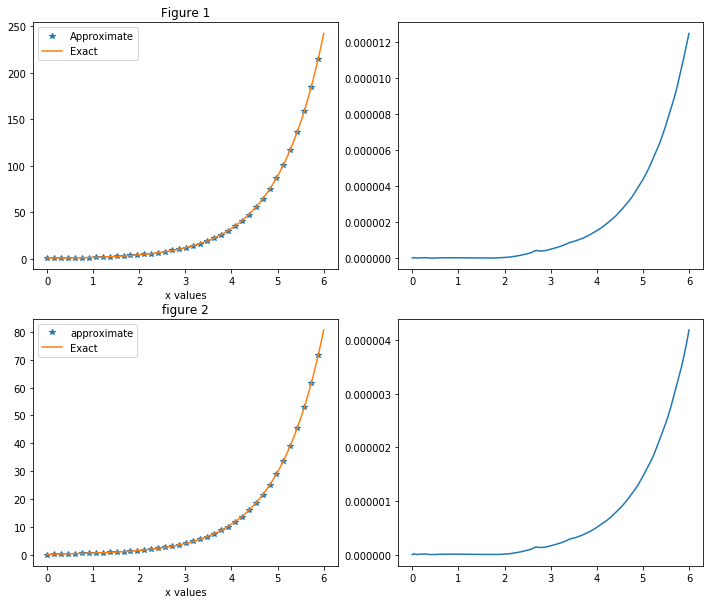

In [5]:
ex1=(1/5)* (3*np.exp(t)+2*np.exp(-4*t))
ex2=(1/5)* (np.exp(t)-np.exp(-4*t))
e1=abs(x1-ex1)
e2=abs(x2-ex2)
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(t[::5],x1[::5],"*")
plt.plot(t,ex1)
plt.title("Figure 1")
plt.legend(["Approximate","Exact"])
plt.xlabel('t values')
plt.xlabel('x values')

plt.subplot(2,2,2)
plt.plot(t, e1)


plt.subplot(2,2,3)
plt.plot(t[::5],x2[::5],"*")
plt.plot(t,ex2)
plt.title("figure 2")
plt.legend(["approximate","Exact"])
plt.xlabel('t values')
plt.xlabel('x values')


plt.subplot(2,2,4)
plt.plot(t,e2)

plt.show()



# $\text{Exercise 3} $

Consider heat conduction in a rod with constant heat conduction properties, $K>0$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -K\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{K}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [6]:
def Matgenerator(a,b,k,N,g,α, β):
    H=(b-a)/N
    x=np.linspace(a,b,N+1)
    A=np.zeros((N+1,N+1))
    B=np.zeros(N+1)
    A[0,0]=1
    A[-1,-1]=1
    B[0]=α
    B[-1]=β
    for i in range(1,N):
        A[i,i]=(2*k/H**2)
        A[i,i+1]=-k/H**2
        A[i,i-1]=-k/H**2
        B[i]=g(x[i])
    return A,B

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, K=1,\alpha = 0, \beta = 2, N= 100 \text{ and } g(x) = -6x-2 $$

In [13]:
a=0
b=1
α=0
β=2
k=1
N=100
g=lambda x: -6*x-2
A,B=Matgenerator(a,b,k,N,g,α, β)
U=np.linalg.solve(A,B)


3. The exact solution of the steady-state heat-conduction problem above is $U(x)=x^3 +x^2$. Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

# $\text{Exercise 4} $

1. Write a function called <b>List_of_factors</b> that takes a positive integer $n$ and returns a list of all the factors of $n$. Test this function by printint the output of <b>List_of_factors</b> for $n=15$

In [10]:
def List_of_factors(n):
    l=[]
    for i in range(1,n+1):
        if n%i==0:
            l.append(i)
    return l
List_of_factors(15)

[1, 3, 5, 15]

2. Using <b>List_of_factors</b>, write a Python function called <b>IsPrime</b> that takes a positive integer $n$  as a argument and returs the boolean <b>True</b> if $n$ is a prime number otherwise it returns the boolean <b> False</b>. Test this function by printing the output of <b>IsPrime</b> for  $n=15$ and $n=97$.

    Note : A prime number (or a prime) is a natural number greater than 1 and that has no positive divisors other than 1 and itself.

In [ ]:

   def List_of_factors(n):
    l=[]
    for i in range(1,n+1):
        if n%i==0:
            l.append(i)
    return l
def IsPrime(n):
    

3. Using <b>IsPrime</b>, write the function <b>primes_start</b> that takes two positive integers $n$, $start$ and return a list of the first n primes that are greater than or equal to $start$. The default value of $start$ should be $2$.

# $\text{Exercise 5} $

1. Write a function called <b>showEmployee</b> in such a way that it should accept employee name and its salary and display both. For axemaple, <b>showEmployee("John",100000)</b> must return <b>"Employee John's salary is 100000"</b>.
if the salary is not given, the function <b>showEmployee</b> must consider 50000 as the salary.

2. Test the fuction <b>showEmployee</b> by using only your name as string.